## Requête SQL avec MySQL

In [21]:
#import library
import pandas as pd
import numpy as np
import sqlite3 as sq

In [10]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sqlalchemy import create_engine

In [12]:
#import connexion SQL
import mysql.connector
import sqlalchemy
import mysql.connector as mysqlConnector

In [13]:
#read database
df= pd.read_csv('data/french.csv')
df

C:\Users\Simplon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,NaN,...,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845841,9999999004360,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1548086277,2019-01-21T15:57:57Z,1558357406,2019-05-20T13:03:26Z,Minis beignets,NaN,NaN,...,333.0,1393.0,20.2,6.00,30.9,10.4,7.4,1.10,0.440,15.0
845842,99999995,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1538818432,2018-10-06T09:33:52Z,1624357822,2021-06-22T10:30:22Z,Faux filet,NaN,NaN,...,131.0,548.0,5.0,2.30,0.0,0.0,21.5,0.18,0.072,-2.0
845843,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845844,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,0.0,0.0,0.2,0.10,8.0,7.8,5.5,0.15,0.060,NaN


In [26]:
conn = sq.connect("nutrition.db")
c= conn.cursor
df.to_sql("french_information",conn, index =False)

### Nombre de produits par nutriscore.
Quel est le pourcentage de représentation associé?

In [48]:
pd.read_sql("""SELECT COUNT(product_name) AS cnt, nutriscore_grade,
CAST(COUNT(product_name) AS float) / (SELECT CAST(COUNT(product_name) AS float) FROM french_information) 
AS percent
FROM french_information
GROUP BY nutriscore_grade""", conn)

,cnt,nutriscore_grade,percent
0,516457,None,0.628279
1,42488,a,0.051687
2,39830,b,0.048454
3,67136,c,0.081672
4,95838,d,0.116589
5,60270,e,0.073319


### Les 4 valeurs possibles du Nova_Group.

In [44]:
pd.read_sql("""SELECT Nova_Group FROM french_information GROUP BY Nova_Group""", conn)

,nova_group
0,NaN
1,1.0
2,2.0
3,3.0
4,4.0


### Quel est la moyenne des fibres par nutriscore ? (Réponse avec colonne protéine car fibre comportait trop de NaN et a été drop)

In [52]:
pd.read_sql("""SELECT nutriscore_grade, AVG(proteins_100g)
FROM french_information
GROUP BY nutriscore_grade""", conn)

,nutriscore_grade,AVG(proteins_100g)
0,None,8.637668
1,a,9.452413
2,b,7.888214
3,c,7.476039
4,d,11.056716
5,e,9.608704


### Quels sont le TOP10 des pnns_groups_2 qui comportent le plus d'additifs

In [53]:
pd.read_sql("""SELECT pnns_groups_2, additives_n
FROM french_information
GROUP BY additives_n
ORDER BY max(additives_n) DESC
LIMIT 10""", conn)

,pnns_groups_2,additives_n
0,Sweets,30.0
1,Sweets,28.0
2,unknown,26.0
3,unknown,25.0
4,Biscuits and cakes,24.0
5,Biscuits and cakes,23.0
6,unknown,22.0
7,Sweets,21.0
8,unknown,20.0
9,Sweets,19.0


### Afficher le taux de sucre/fat moyen et médian des produits avec un nutriscore A ou B

Réponse faite sur SQLiteStudio

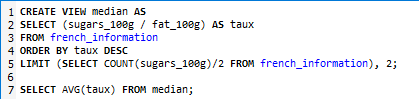

Pour une median df paire

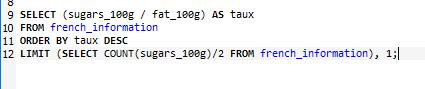

Pour une median df impaire

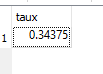

### Combien avons-nous de produits qui ont un taux de carbohydrates > aux sucres

In [55]:
pd.read_sql("""SELECT COUNT(product_name)
FROM french_information
WHERE carbohydrates_100g > sugars_100g""", conn)

,COUNT(product_name)
0,500811
